In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

def get_lists_for_plotting(merged_df, pollutant_column, tax_column, string_column):

    country_names = merged_df['Country'].unique()
    country_list = []
    pollutant_list = []
    tax_list = []
    year_list = []
    stringency_list = []
    
    for country in country_names:
        df = merged_df.loc[merged_df['Country'] == country, :]
        df = df[['Country', 'Year', pollutant_column, tax_column, string_column]]
        df = df.dropna().reset_index()
        df[pollutant_column] = df[pollutant_column].astype(float)
        df[tax_column] = df[tax_column].astype(float)
        df[string_column] = df[string_column].astype(float)
        
        years = list(df['Year'].values)
        pollutant = list(df[pollutant_column].values)
        tax = list(df[tax_column].values)
        stringency = list(df[string_column].values)

        country_list.append(country)
        pollutant_list.append(pollutant)
        tax_list.append(tax)
        year_list.append(years)
        stringency_list.append(stringency)
    
    return country_list, year_list, tax_list, pollutant_list, stringency_list

def plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label):
    for i in range(len(country_list)):
        try:
            x_axis = np.arange(year_list[i][0], (year_list[i][len(year_list[i])-1]) + 1, 1)

            fig, ax1 = plt.subplots()
            fig.subplots_adjust(right=0.75)
            ax2 = ax1.twinx()
            ax3 = ax1.twinx()

            ax3.spines["right"].set_position(("axes", 1.2))
            ax3.spines["right"].set_visible(True)
            make_patch_spines_invisible(ax3)

            plt1 = ax1.plot(year_list[i], tax_list[i], linestyle='--', marker='o', color='b')
            plt2 = ax2.plot(year_list[i], pollutant_list[i], linestyle='--', marker='o', color='g')
            plt3 = ax3.plot(year_list[i], stringency_list[i], linestyle='--', marker='o', color='m')

            plots = plt1+plt2+plt3

            ax1.legend(plots, legend_list, loc='upper center', bbox_to_anchor=(0.5, -0.22), \
                       fancybox=True, shadow=True, ncol=3)

            ax1.set_xticks(x_axis)
            ax1.set_xticklabels(x_axis, rotation=40)
            ax1.set_title(f"{country_list[i]} {title}")
            ax1.set_xlabel(x_label)
            
            ax1.set_ylabel(legend_list[1], color='b')
            ax2.set_ylabel(legend_list[0], color='g')
            ax3.set_ylabel(legend_list[2], color='m')
            
            ax1.tick_params(axis='y', colors='b')
            ax2.tick_params(axis='y', colors='g')
            ax3.tick_params(axis='y', colors='m')
            fig.savefig(f"../Images/{country_list[i]}_{title}.png")
        except IndexError:
            print(f'No data for {country_list[i]}')

In [4]:
data_file = pd.read_csv("../Data/Stacy_Final_Data/Final_Data_Table.csv")

In [5]:
environment_df = pd.DataFrame(data_file)

In [6]:
environment_df = environment_df.replace('No Data', np.nan)
environment_df.head()

,Unnamed: 0,Country,Year,Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent),Tonnes of CO2 Emiss exc LULUCF,Mean Pop Exp To PM2.5 (µg/m3),Percent Total Tax Rev for Env,Percent Total Gov R&D Budget For Env,GDP Per Capita USD2010PPP,Environmental Policy Stringency,Tonnes of Municipal Waste Generated
0,0,Australia,1990,419843.155,278352.79,NaN,NaN,3.114999,28772.28,0.5,NaN
1,1,Australia,1991,420927.191,279807.363,NaN,NaN,NaN,NaN,0.5,NaN
2,2,Australia,1992,425820.883,284840.06,NaN,NaN,NaN,NaN,0.5,12000.0
3,3,Australia,1993,426128.333,289230.533,NaN,NaN,NaN,NaN,0.75,NaN
4,4,Australia,1994,426074.577,293928.812,NaN,8.437897399,NaN,NaN,0.5,NaN


In [7]:
environment_df['Mean Pop Exp To PM2.5 (µg/m3)'] = environment_df['Mean Pop Exp To PM2.5 (µg/m3)'].astype(float)
environment_df['Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent)'] = environment_df['Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent)'].astype(float)
environment_df['Tonnes of CO2 Emiss exc LULUCF'] = environment_df['Tonnes of CO2 Emiss exc LULUCF'].astype(float)
environment_df['Percent Total Tax Rev for Env'] = environment_df['Percent Total Tax Rev for Env'].astype(float)
environment_df['Percent Total Gov R&D Budget For Env'] = environment_df['Percent Total Gov R&D Budget For Env'].astype(float)
environment_df['GDP Per Capita USD2010PPP'] = environment_df['GDP Per Capita USD2010PPP'].astype(float)
environment_df['Tonnes of Municipal Waste Generated'] = environment_df['Tonnes of Municipal Waste Generated'].astype(float)
environment_df['Environmental Policy Stringency'] = environment_df['Environmental Policy Stringency'].astype(float)
environment_df['Year'] = environment_df['Year'].astype(int)

In [8]:
del environment_df['Unnamed: 0']

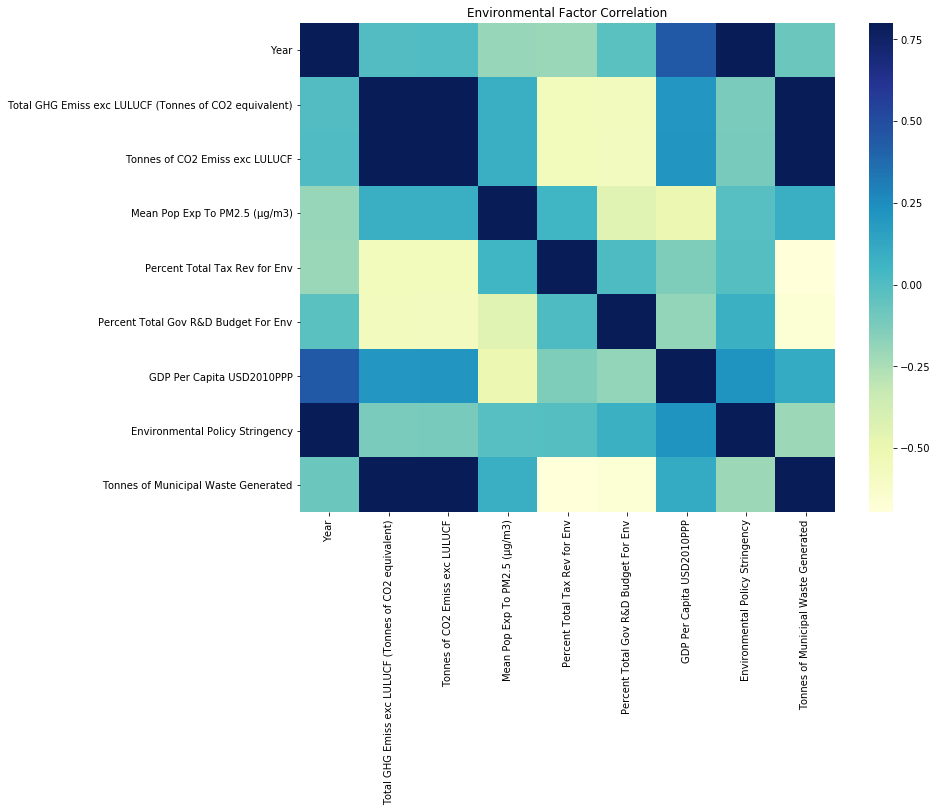

In [9]:
corrmat = environment_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, cmap="YlGnBu").set_title("Environmental Factor Correlation");

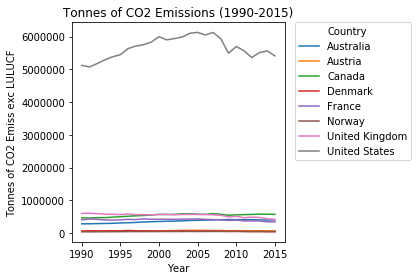

In [47]:
sns.lineplot(x='Year', y='Tonnes of CO2 Emiss exc LULUCF', data=environment_df, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Tonnes of CO2 Emissions (1990-2015)')
plt.tight_layout()
plt.savefig("../Images/Tonnes_CO2_Emissions.png")

In [11]:
environment_df['Percent CO2 Emissions (1990 Baseline)'] = ""

In [12]:
for index, row in environment_df.iterrows():
    if row['Year'] == 1990:
        value_1990 = row['Tonnes of CO2 Emiss exc LULUCF']
    tonnes_co2 = row['Tonnes of CO2 Emiss exc LULUCF']
    percent_co2 = round((tonnes_co2/value_1990) * 100, 3)
    
    environment_df.loc[index, 'Percent CO2 Emissions (1990 Baseline)'] = percent_co2
environment_df.head()

,Country,Year,Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent),Tonnes of CO2 Emiss exc LULUCF,Mean Pop Exp To PM2.5 (µg/m3),Percent Total Tax Rev for Env,Percent Total Gov R&D Budget For Env,GDP Per Capita USD2010PPP,Environmental Policy Stringency,Tonnes of Municipal Waste Generated,Percent CO2 Emissions (1990 Baseline)
0,Australia,1990,419843.155,278352.790,NaN,NaN,3.114999,28772.28,0.50,NaN,100
1,Australia,1991,420927.191,279807.363,NaN,NaN,NaN,NaN,0.50,NaN,100.523
2,Australia,1992,425820.883,284840.060,NaN,NaN,NaN,NaN,0.50,12000.0,102.331
3,Australia,1993,426128.333,289230.533,NaN,NaN,NaN,NaN,0.75,NaN,103.908
4,Australia,1994,426074.577,293928.812,NaN,8.437897,NaN,NaN,0.50,NaN,105.596


In [13]:
environment_df['Percent CO2 Emissions (1990 Baseline)'] = environment_df['Percent CO2 Emissions (1990 Baseline)'].astype(float)

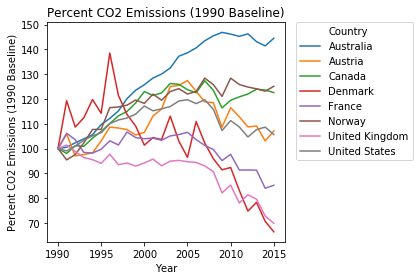

In [48]:
sns.lineplot(x='Year', y='Percent CO2 Emissions (1990 Baseline)', data=environment_df, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Percent CO2 Emissions (1990 Baseline)')
plt.tight_layout()
plt.savefig("../Images/Percent_CO2_Emissions.png")

No handles with labels found to put in legend.


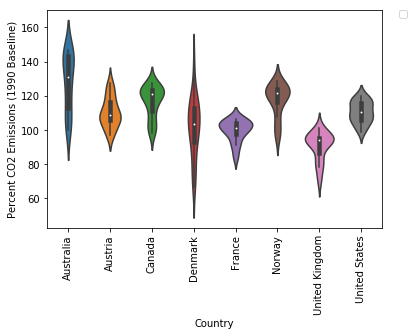

In [15]:
sns.violinplot(x=environment_df['Country'], y=environment_df['Percent CO2 Emissions (1990 Baseline)'], \
               data=environment_df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

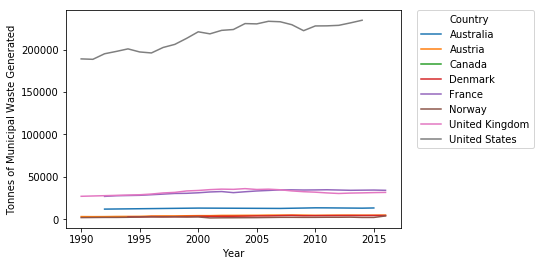

In [16]:
sns.lineplot(x='Year', y='Tonnes of Municipal Waste Generated', data=environment_df, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

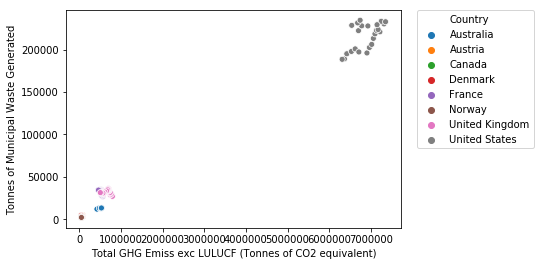

In [17]:
sns.scatterplot(x='Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent)', \
                y='Tonnes of Municipal Waste Generated', data=environment_df, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
environment_df['Percent Municipal Waste (Earliest Reported Yr Baseline)'] = ""

In [19]:
country_old = ""
for index, row in environment_df.iterrows():
    try:
        country = row['Country']
        waste_value = row['Tonnes of Municipal Waste Generated']
        if country != country_old:
            if ~np.isnan(waste_value):
                value_baseline = waste_value
                country_old = row['Country']
        tonnes_waste = waste_value
        percent_waste = round((tonnes_waste/value_baseline) * 100, 3)

        environment_df.loc[index, 'Percent Municipal Waste (Earliest Reported Yr Baseline)'] = percent_waste
    except:
        environment_df.loc[index, 'Percent Municipal Waste (Earliest Reported Yr Baseline)'] = np.nan
environment_df.head()

,Country,Year,Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent),Tonnes of CO2 Emiss exc LULUCF,Mean Pop Exp To PM2.5 (µg/m3),Percent Total Tax Rev for Env,Percent Total Gov R&D Budget For Env,GDP Per Capita USD2010PPP,Environmental Policy Stringency,Tonnes of Municipal Waste Generated,Percent CO2 Emissions (1990 Baseline),Percent Municipal Waste (Earliest Reported Yr Baseline)
0,Australia,1990,419843.155,278352.790,NaN,NaN,3.114999,28772.28,0.50,NaN,100.000,NaN
1,Australia,1991,420927.191,279807.363,NaN,NaN,NaN,NaN,0.50,NaN,100.523,NaN
2,Australia,1992,425820.883,284840.060,NaN,NaN,NaN,NaN,0.50,12000.0,102.331,100
3,Australia,1993,426128.333,289230.533,NaN,NaN,NaN,NaN,0.75,NaN,103.908,NaN
4,Australia,1994,426074.577,293928.812,NaN,8.437897,NaN,NaN,0.50,NaN,105.596,NaN


In [20]:
environment_df['Percent Municipal Waste (Earliest Reported Yr Baseline)'] = environment_df['Percent Municipal Waste (Earliest Reported Yr Baseline)'].astype(float)

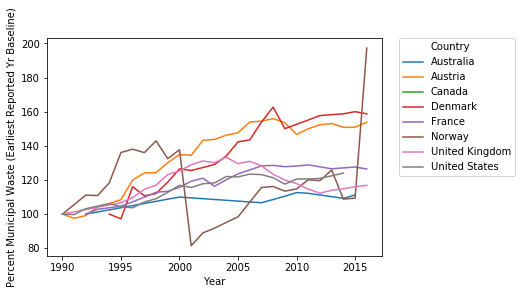

In [21]:
sns.lineplot(x='Year', y='Percent Municipal Waste (Earliest Reported Yr Baseline)', data=environment_df, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
#sns.scatterplot(x='Percent CO2 Emissions (1990 Baseline)', \
#                y="Percent Municipal Waste (Earliest Reported Yr Baseline)", data=environment_df, hue='Country')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
#sns.lmplot(x='Percent CO2 Emissions (1990 Baseline)', \
#                y="Percent Municipal Waste (Earliest Reported Yr Baseline)", data=environment_df)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

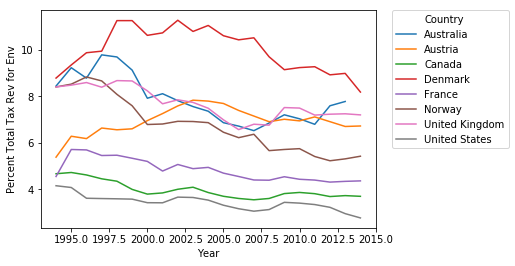

In [22]:
sns.lineplot(x='Year', y='Percent Total Tax Rev for Env', data=environment_df, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
#sns.scatterplot(x="GDP Per Capita USD2010PPP", y="Environmental Policy Stringency", data=environment_df)

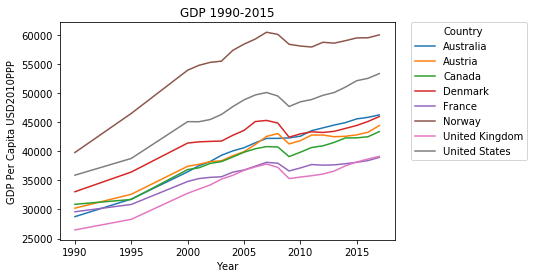

In [23]:
sns.lineplot(x='Year', y='GDP Per Capita USD2010PPP', data=environment_df, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('GDP 1990-2015')
plt.savefig("../Images/GDP.png")

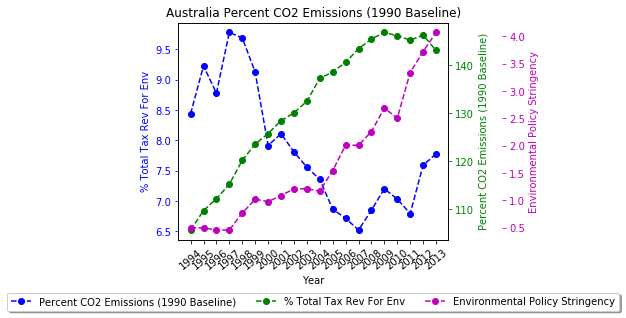

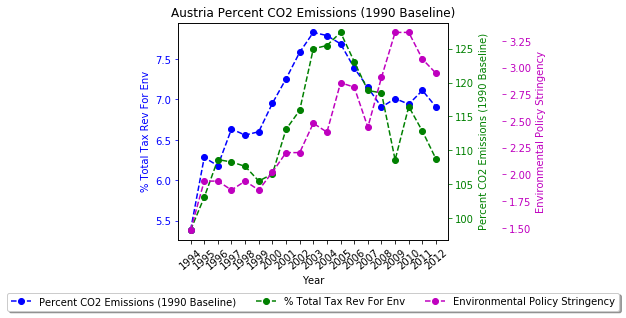

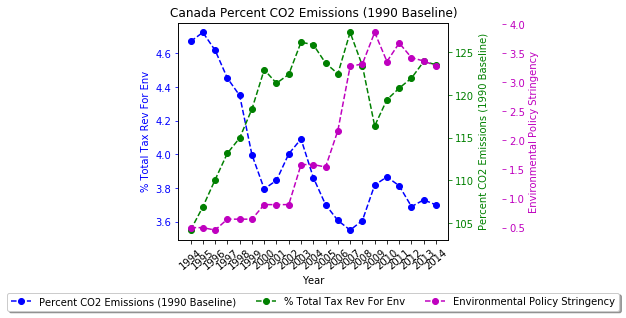

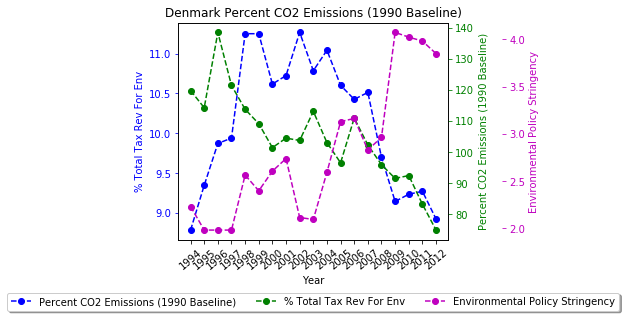

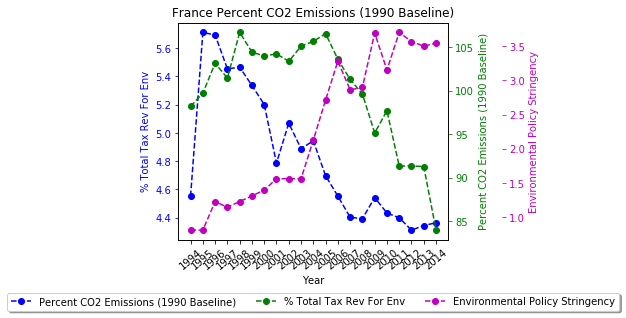

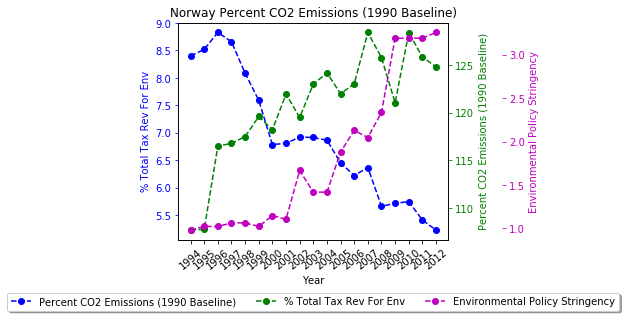

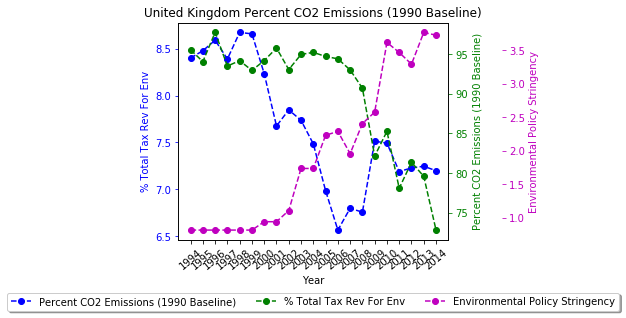

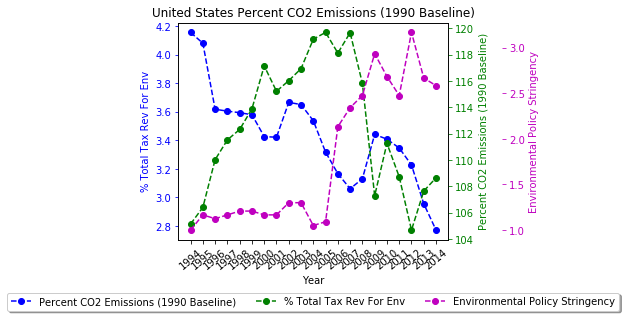

In [24]:
country_list, year_list, tax_list, pollutant_list, stringency_list = \
get_lists_for_plotting(environment_df, 'Percent CO2 Emissions (1990 Baseline)', 'Percent Total Tax Rev for Env', 'Environmental Policy Stringency')

legend_list = ['Percent CO2 Emissions (1990 Baseline)', '% Total Tax Rev For Env', 'Environmental Policy Stringency']
title = 'Percent CO2 Emissions (1990 Baseline)'
x_label = 'Year'

plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label)

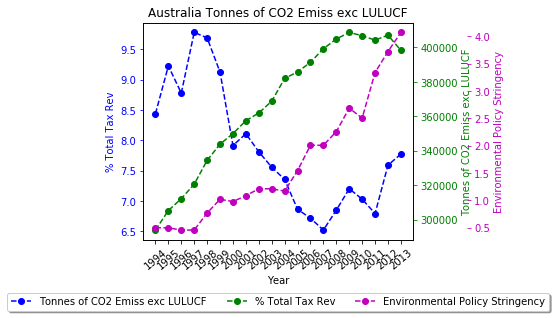

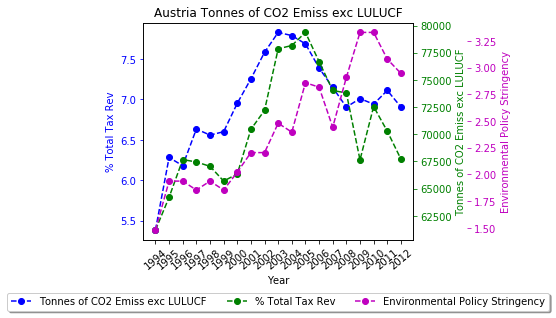

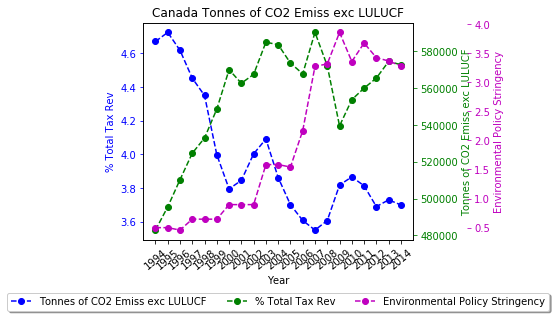

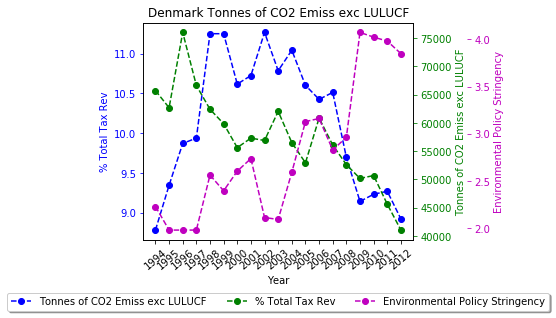

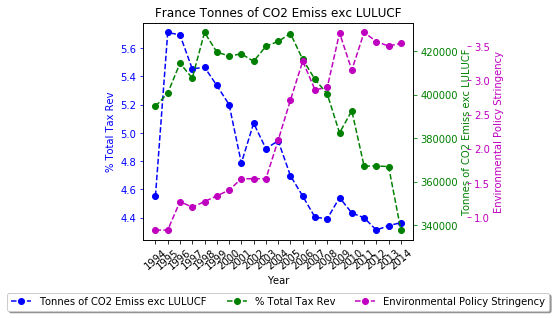

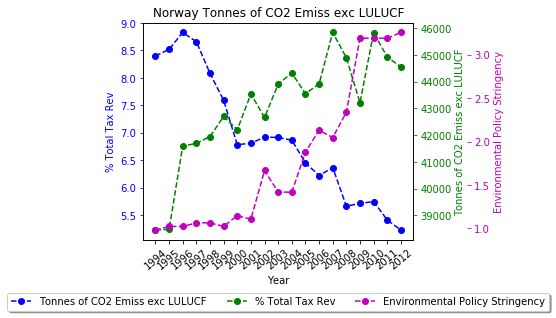

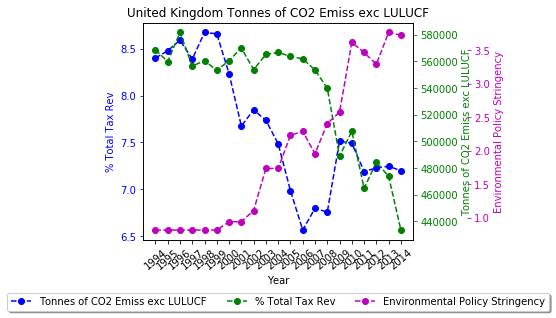

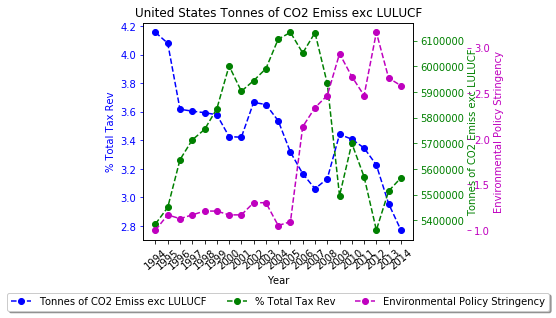

In [25]:
country_list, year_list, tax_list, pollutant_list, stringency_list = \
get_lists_for_plotting(environment_df, 'Tonnes of CO2 Emiss exc LULUCF', 'Percent Total Tax Rev for Env', \
                       'Environmental Policy Stringency')

legend_list = ['Tonnes of CO2 Emiss exc LULUCF', '% Total Tax Rev', 'Environmental Policy Stringency']
title = 'Tonnes of CO2 Emiss exc LULUCF'
x_label = 'Year'

plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label)

In [ ]:
#country_list, year_list, tax_list, pollutant_list, stringency_list = \
#get_lists_for_plotting(environment_df, 'Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent)', 'Percent Total Tax Rev for Env', \
#                       'Environmental Policy Stringency')

#legend_list = ['Total GHG Emiss exc LULUCF', '% Total Tax Rev', 'Environmental Policy Stringency']
#title = 'Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent)'
#x_label = 'Year'

#plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
#                              title, x_label)

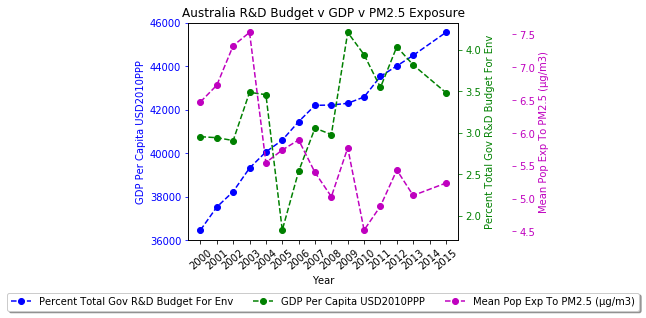

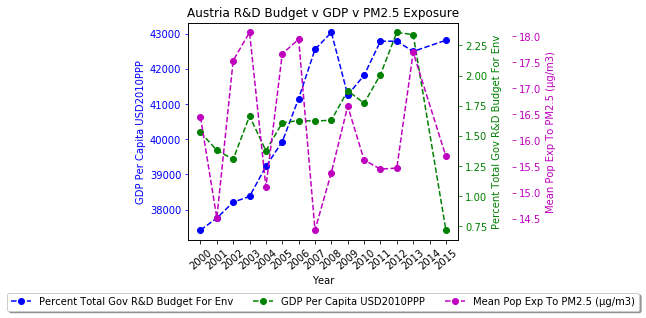

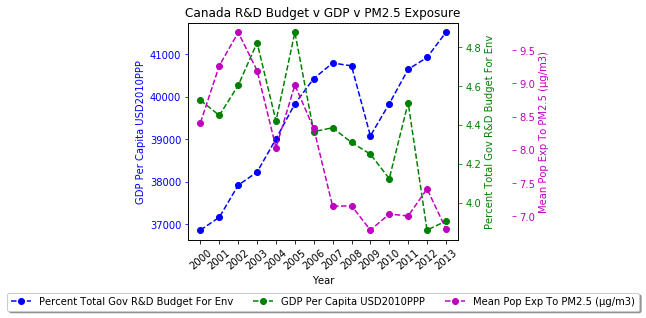

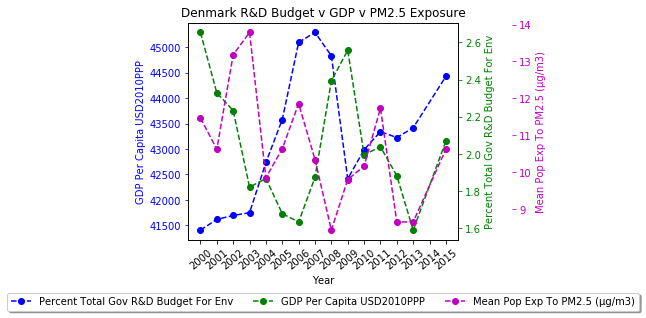

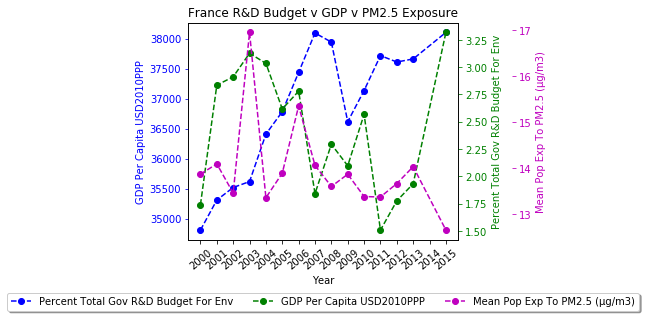

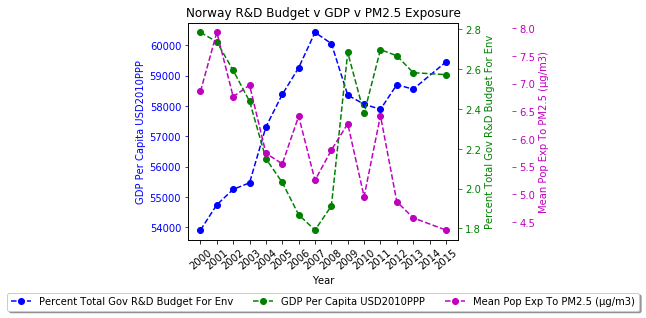

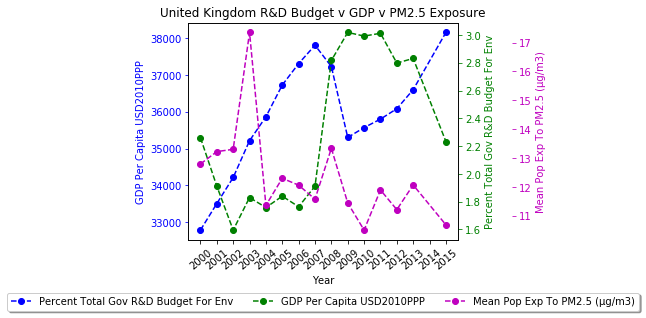

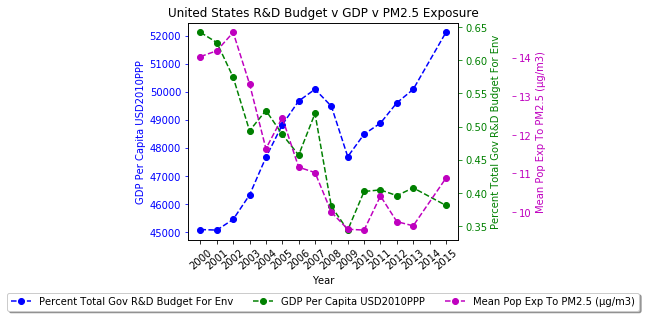

In [26]:
country_list, year_list, tax_list, pollutant_list, stringency_list = \
get_lists_for_plotting(environment_df, 'Percent Total Gov R&D Budget For Env', 'GDP Per Capita USD2010PPP', \
                       'Mean Pop Exp To PM2.5 (µg/m3)')
legend_list = ['Percent Total Gov R&D Budget For Env', 'GDP Per Capita USD2010PPP', 'Mean Pop Exp To PM2.5 (µg/m3)']
title = 'R&D Budget v GDP v PM2.5 Exposure'
x_label = 'Year'

plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label)

In [ ]:
#sns.distplot(environment_df['GDP Per Capita USD2010PPP'].dropna())
#sns.distplot(environment_df['Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent)'].dropna())

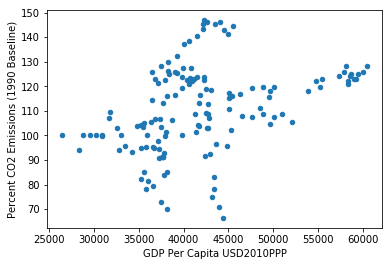

In [27]:
var = 'GDP Per Capita USD2010PPP'
data = pd.concat([environment_df['Percent CO2 Emissions (1990 Baseline)'], environment_df[var]], axis=1)
data.plot.scatter(x=var, y='Percent CO2 Emissions (1990 Baseline)');

No handles with labels found to put in legend.


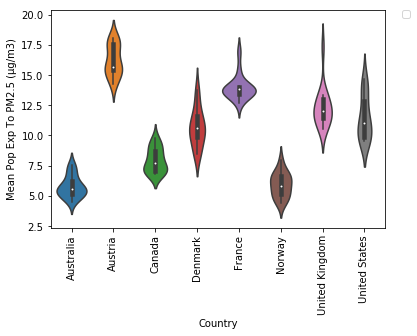

In [28]:
sns.violinplot(x=environment_df['Country'], y=environment_df['Mean Pop Exp To PM2.5 (µg/m3)'], \
               data=environment_df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


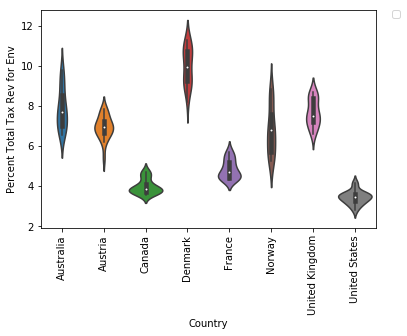

In [29]:
sns.violinplot(x=environment_df['Country'], y=environment_df['Percent Total Tax Rev for Env'], \
               data=environment_df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

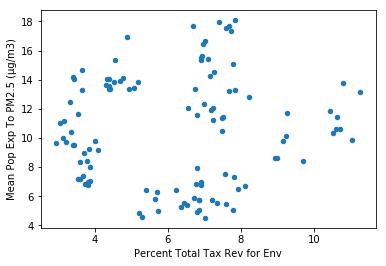

In [30]:
var = 'Percent Total Tax Rev for Env'
data = pd.concat([environment_df['Mean Pop Exp To PM2.5 (µg/m3)'], environment_df[var]], axis=1)
data.plot.scatter(x=var, y='Mean Pop Exp To PM2.5 (µg/m3)');

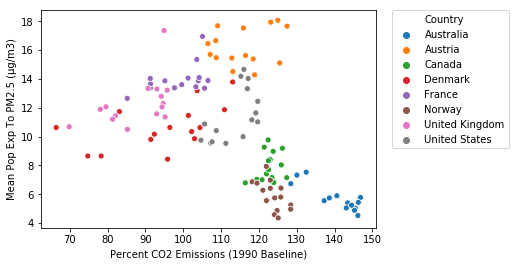

In [31]:
sns.scatterplot(x='Percent CO2 Emissions (1990 Baseline)', \
                y="Mean Pop Exp To PM2.5 (µg/m3)", data=environment_df, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
#US_df = environment_df.loc[environment_df['Country'] == 'United States', :].reset_index()
#US_df.index = US_df['Year']
#US_df[['Mean Pop Exp To PM2.5 (µg/m3)', 'Percent Total Tax Rev for Env', 'Percent Total Gov R&D Budget For Env',\
#       'Environmental Policy Stringency']].plot.area()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [32]:
biodiversity_file = pd.read_csv("../Data/biodiversitytomerge.csv")
biodiversity_df = pd.DataFrame(biodiversity_file)
biodiversity_df.head()

,Unnamed: 0,Country,variable,value
0,0,South Africa,1974,100.0
1,1,France,1974,100.0
2,2,Austria,1974,100.0
3,3,Austria,1974,100.0
4,4,France,1974,100.0


In [33]:
final_country_list = ['Austria', 'United Kingdom', 'Canada', 'United States', 'Norway', 'Denmark', 'France', \
                      'Australia']

In [34]:
biodiversity_df = biodiversity_df.groupby(['Country', 'variable'])['value'].agg(['mean']).reset_index()
biodiversity_df = biodiversity_df.loc[biodiversity_df['Country'].isin(final_country_list)]

In [35]:
biodiversity_df = biodiversity_df.rename(columns={'variable' : 'Year', 'mean': 'Average % Biodiversity (Over 1974 Baseline)'})
biodiversity_df.head()

,Country,Year,Average % Biodiversity (Over 1974 Baseline)
0,Australia,1974,100.000000
1,Australia,1975,88.275404
2,Australia,1976,103.483910
3,Australia,1977,114.758458
4,Australia,1978,101.085156


In [36]:
environment_plus_biodiv_df = pd.merge(environment_df, biodiversity_df, on=['Country', 'Year'], how='inner')
environment_plus_biodiv_df.head()

,Country,Year,Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent),Tonnes of CO2 Emiss exc LULUCF,Mean Pop Exp To PM2.5 (µg/m3),Percent Total Tax Rev for Env,Percent Total Gov R&D Budget For Env,GDP Per Capita USD2010PPP,Environmental Policy Stringency,Tonnes of Municipal Waste Generated,Percent CO2 Emissions (1990 Baseline),Percent Municipal Waste (Earliest Reported Yr Baseline),Average % Biodiversity (Over 1974 Baseline)
0,Australia,1990,419843.155,278352.790,NaN,NaN,3.114999,28772.28,0.50,NaN,100.000,NaN,53.992501
1,Australia,1991,420927.191,279807.363,NaN,NaN,NaN,NaN,0.50,NaN,100.523,NaN,47.824018
2,Australia,1992,425820.883,284840.060,NaN,NaN,NaN,NaN,0.50,12000.0,102.331,100.0,71.741146
3,Australia,1993,426128.333,289230.533,NaN,NaN,NaN,NaN,0.75,NaN,103.908,NaN,51.364996
4,Australia,1994,426074.577,293928.812,NaN,8.437897,NaN,NaN,0.50,NaN,105.596,NaN,59.278603


In [37]:
correlation_env_df = environment_plus_biodiv_df[['Country', 'Average % Biodiversity (Over 1974 Baseline)', \
                                     'Mean Pop Exp To PM2.5 (µg/m3)', 'Tonnes of CO2 Emiss exc LULUCF', \
                                     'Percent CO2 Emissions (1990 Baseline)', 'GDP Per Capita USD2010PPP', \
                                     'Percent Total Gov R&D Budget For Env', 'Percent Total Tax Rev for Env', \
                                     'Environmental Policy Stringency']]

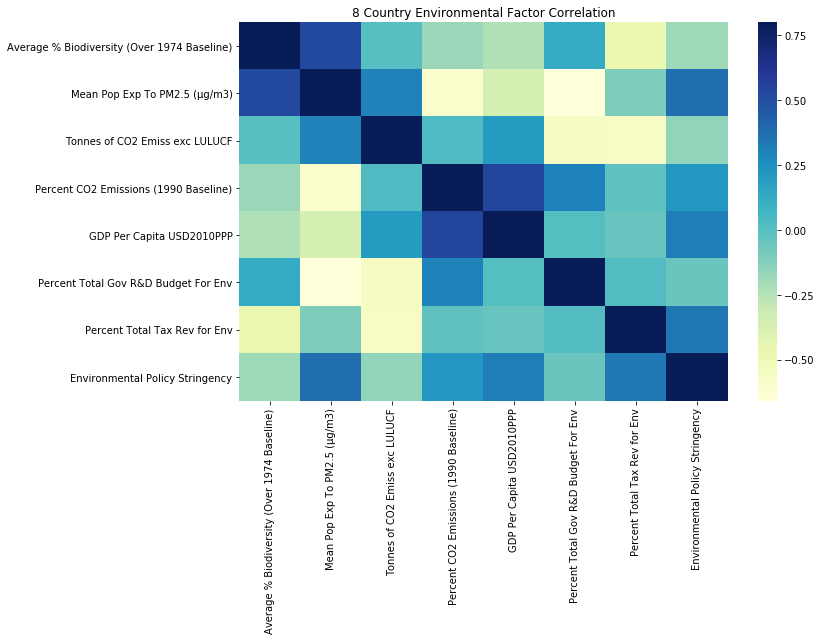

In [38]:
corrmat = correlation_env_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns_plot = sns.heatmap(corrmat, vmax=.8, cmap="YlGnBu").set_title('8 Country Environmental Factor Correlation')
f.tight_layout()
f.savefig("../Images/8_Country_Correlation.png")

In [39]:
US_env_corr_df = correlation_env_df.loc[correlation_env_df['Country'] == 'United States', :]
Canada_env_corr_df = correlation_env_df.loc[correlation_env_df['Country'] == 'Canada', :]
Austria_env_corr_df = correlation_env_df.loc[correlation_env_df['Country'] == 'Austria', :]
France_env_corr_df = correlation_env_df.loc[correlation_env_df['Country'] == 'France', :]

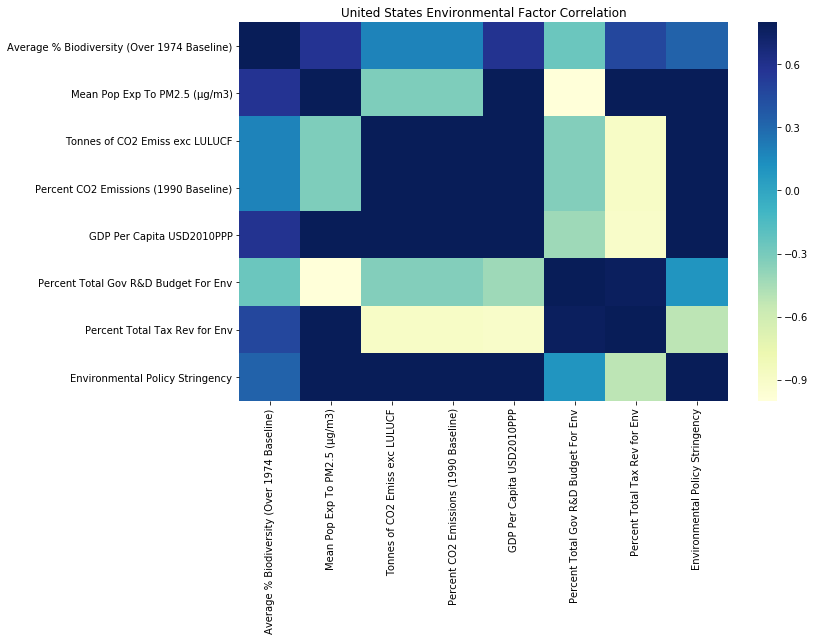

In [40]:
corrmat = US_env_corr_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, cmap="YlGnBu").set_title('United States Environmental Factor Correlation')
f.tight_layout()
f.savefig("../Images/US_Env_Factor_Correlation.png")

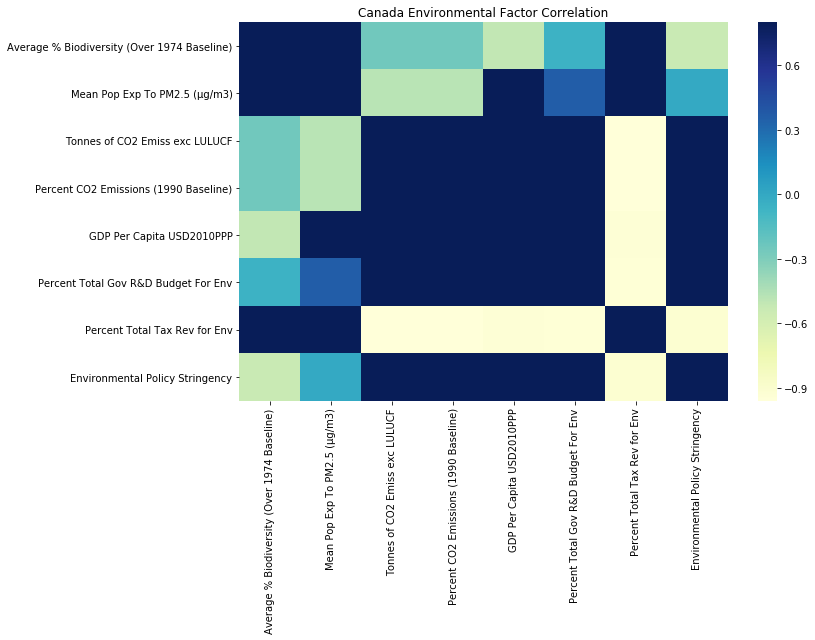

In [41]:
corrmat = Canada_env_corr_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, cmap="YlGnBu").set_title('Canada Environmental Factor Correlation')
f.tight_layout()
f.savefig("../Images/Canada_Env_Correlation.png")

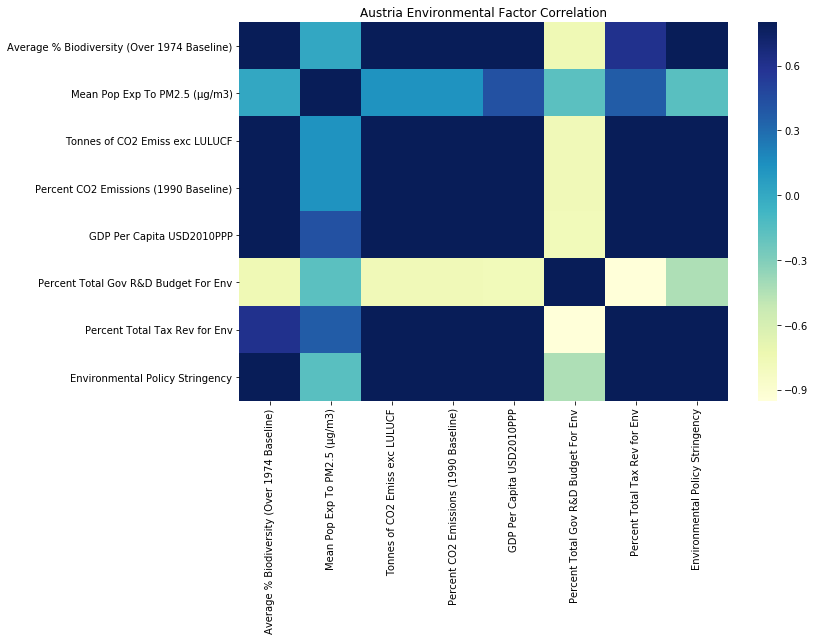

In [42]:
corrmat = Austria_env_corr_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, cmap="YlGnBu").set_title('Austria Environmental Factor Correlation')
f.tight_layout()
f.savefig("../Images/Austria_Env_Correlation.png")

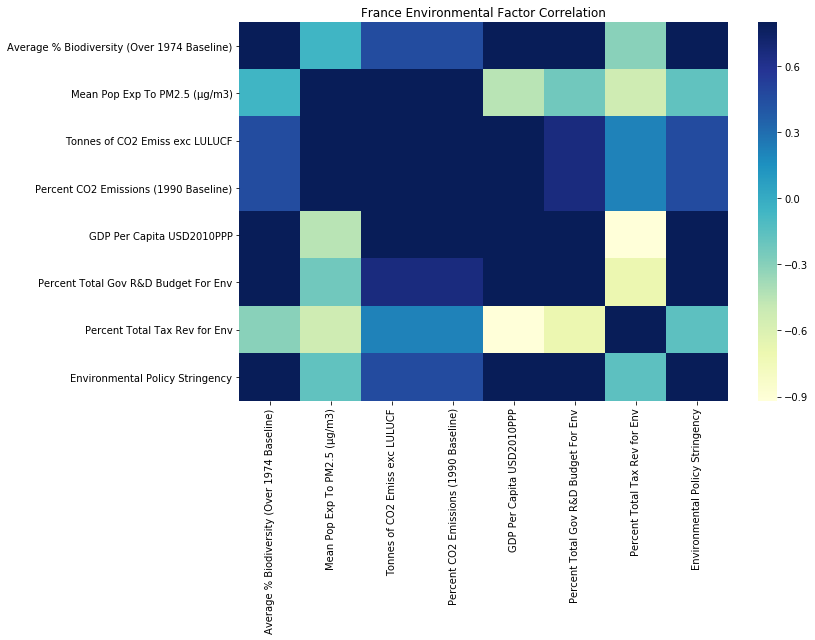

In [43]:
corrmat = France_env_corr_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, cmap="YlGnBu").set_title('France Environmental Factor Correlation')
f.tight_layout()
f.savefig("../Images/France_Env_Correlation.png")

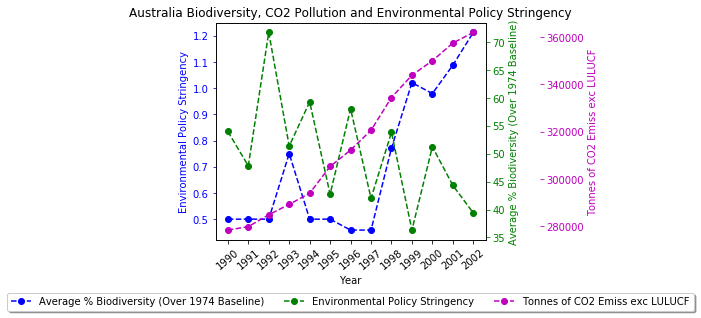

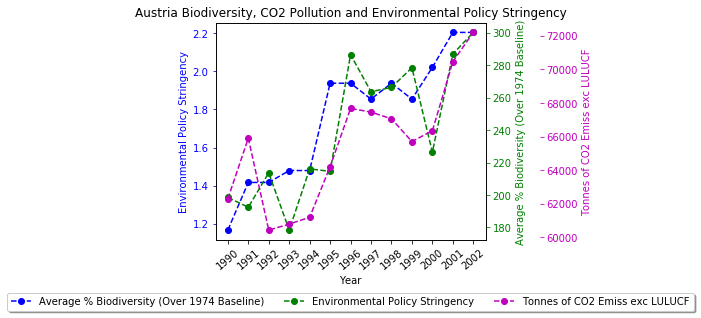

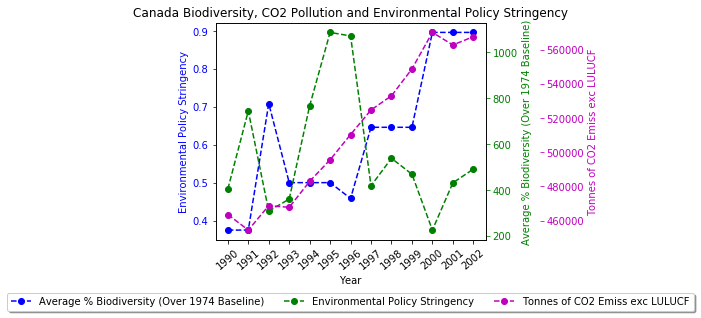

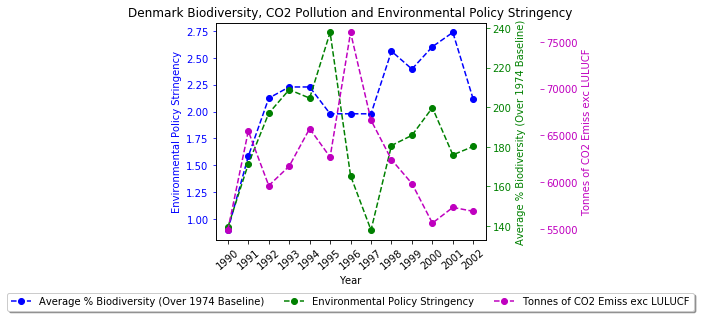

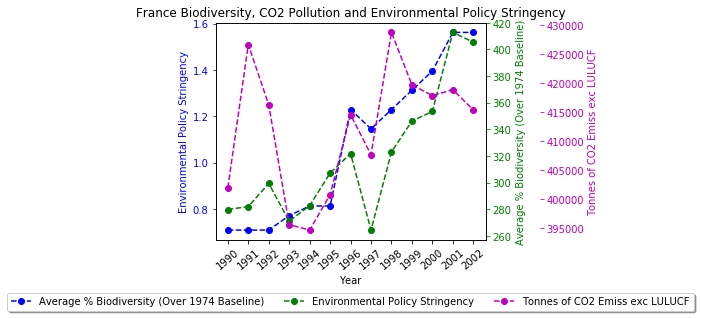

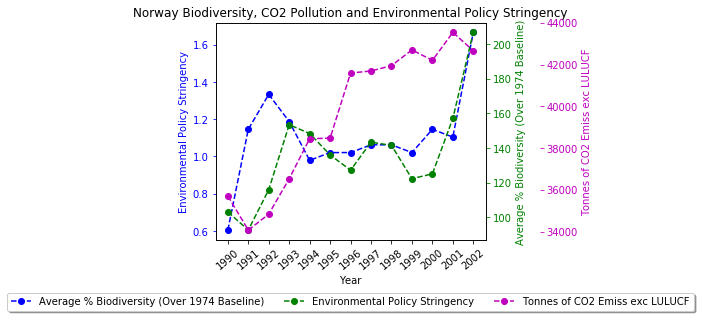

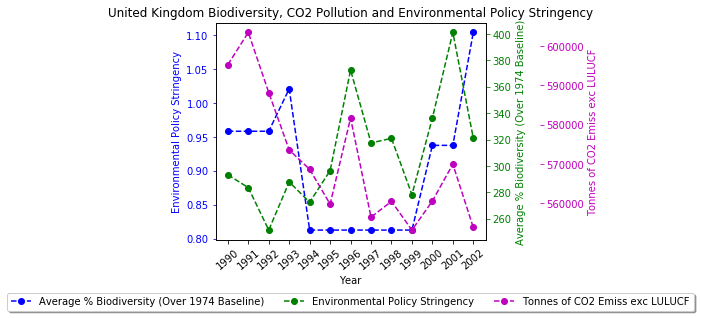

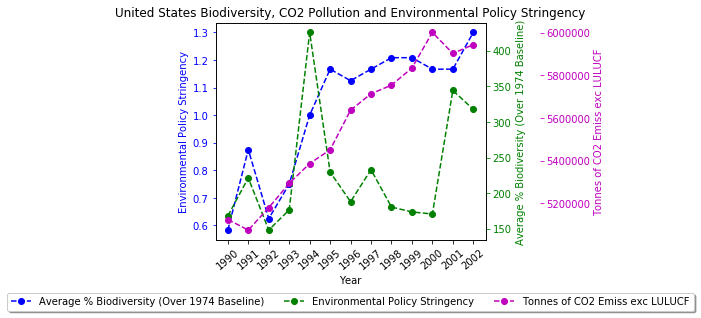

In [45]:
country_list, year_list, tax_list, pollutant_list, stringency_list = \
get_lists_for_plotting(environment_plus_biodiv_df, 'Average % Biodiversity (Over 1974 Baseline)', 'Environmental Policy Stringency', \
                       'Tonnes of CO2 Emiss exc LULUCF')
legend_list = ['Average % Biodiversity (Over 1974 Baseline)', 'Environmental Policy Stringency', 'Tonnes of CO2 Emiss exc LULUCF']
title = 'Biodiversity, CO2 Pollution and Environmental Policy Stringency'
x_label = 'Year'

plot_tax_string_pollutant(country_list, year_list, tax_list, pollutant_list, stringency_list, legend_list, \
                              title, x_label)

In [44]:
environment_plus_biodiv_df.columns

Index(['Country', 'Year',
       'Total GHG Emiss exc LULUCF (Tonnes of CO2 equivalent)',
       'Tonnes of CO2 Emiss exc LULUCF', 'Mean Pop Exp To PM2.5 (µg/m3)',
       'Percent Total Tax Rev for Env', 'Percent Total Gov R&D Budget For Env',
       'GDP Per Capita USD2010PPP', 'Environmental Policy Stringency',
       'Tonnes of Municipal Waste Generated',
       'Percent CO2 Emissions (1990 Baseline)',
       'Percent Municipal Waste (Earliest Reported Yr Baseline)',
       'Average % Biodiversity (Over 1974 Baseline)'],
      dtype='object')